In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os


In [164]:
circuits = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\circuits.csv')
constructor_results = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructor_results.csv')
constructor_standings = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructor_standings.csv')
constructors = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructors.csv')
driver_standings = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\driver_standings.csv')
drivers = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\drivers.csv')
pit_stops = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\pit_stops.csv')
qualifying = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\qualifying.csv')
races = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\races.csv')
seasons = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\seasons.csv')
sprint_results = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\sprint_results.csv')
status = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\status.csv')
results = pd.read_csv(r'C:\Users\redye\Desktop\Group4\Group-4\Formula_1_csvs\results.csv\results.csv')

In [165]:
pit_stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [166]:
pit_stops.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,9634.0,956.103384,76.862933,841.0,885.00,953.0,1024.00,1096.0
driverId,9634.0,513.030828,391.682304,1.0,18.00,815.0,830.00,856.0
stop,9634.0,1.760536,0.914522,1.0,1.00,2.0,2.00,6.0
lap,9634.0,25.255553,14.579838,1.0,13.00,25.0,36.00,78.0
milliseconds,9634.0,72401.730641,273833.956873,12897.0,21908.25,23557.0,26186.75,3069017.0


In [167]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [168]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [169]:
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
pit_stops = pit_stops.rename(columns={'time':'pitTime'})

In [170]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [171]:
df = results.loc[results["raceId"].between(1052,1073)]
df2 = pit_stops.loc[pit_stops["raceId"].between(1052, 1073)]

In [172]:
df.replace(to_replace = '\\N', value = 'NaN', inplace = True)
df2.replace(to_replace = '\\N', value = 'NaN', inplace = True)

C:\Users\redye\AppData\Local\Temp\ipykernel_25852\3038146868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace = '\\N', value = 'NaN', inplace = True)
C:\Users\redye\AppData\Local\Temp\ipykernel_25852\3038146868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(to_replace = '\\N', value = 'NaN', inplace = True)


In [179]:
df3 = pd.merge(df, df2, on="raceId",how="left")
df3

,resultId,raceId,driverId_x,constructorId,number,grid,position,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,driverId_y,stop,lap,pitTime,duration,milliseconds_y
0,24966,1052,1,131,44,2,1,1,1,25.0,...,4,1:34.015,207.235,1,815.0,1.0,2.0,18:11:56,23.993,23993.0
1,24966,1052,1,131,44,2,1,1,1,25.0,...,4,1:34.015,207.235,1,842.0,1.0,4.0,18:16:14,38.338,38338.0
2,24966,1052,1,131,44,2,1,1,1,25.0,...,4,1:34.015,207.235,1,4.0,1.0,11.0,18:27:32,24.373,24373.0
3,24966,1052,1,131,44,2,1,1,1,25.0,...,4,1:34.015,207.235,1,846.0,1.0,12.0,18:29:05,24.899,24899.0
4,24966,1052,1,131,44,2,1,1,1,25.0,...,4,1:34.015,207.235,1,844.0,1.0,12.0,18:29:06,24.925,24925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15375,25405,1073,853,210,9,20,NaN,W,20,0.0,...,0,NaN,NaN,139,840.0,2.0,52.0,18:22:55,22.661,22661.0
15376,25405,1073,853,210,9,20,NaN,W,20,0.0,...,0,NaN,NaN,139,815.0,3.0,53.0,18:23:09,21.385,21385.0
15377,25405,1073,853,210,9,20,NaN,W,20,0.0,...,0,NaN,NaN,139,854.0,2.0,52.0,18:23:42,22.070,22070.0
15378,25405,1073,853,210,9,20,NaN,W,20,0.0,...,0,NaN,NaN,139,852.0,2.0,53.0,18:24:01,21.909,21909.0


In [182]:
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [184]:
df3 = pd.merge(df3, drivers, on="driverId",how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24966,1052,1,131,44,2,1,1,1,25.0,...,23993.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,24966,1052,1,131,44,2,1,1,1,25.0,...,38338.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,24966,1052,1,131,44,2,1,1,1,25.0,...,24373.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
3,24966,1052,1,131,44,2,1,1,1,25.0,...,24899.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
4,24966,1052,1,131,44,2,1,1,1,25.0,...,24925.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15375,25405,1073,853,210,9,20,NaN,W,20,0.0,...,22661.0,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin
15376,25405,1073,853,210,9,20,NaN,W,20,0.0,...,21385.0,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin
15377,25405,1073,853,210,9,20,NaN,W,20,0.0,...,22070.0,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin
15378,25405,1073,853,210,9,20,NaN,W,20,0.0,...,21909.0,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin


In [185]:
df4 = df3.groupby('code').describe()
df4

resultId                                                                 \
        count          mean         std      min      25%      50%       75%   
code                                                                           
ALO     769.0  25172.723017  133.707246  24984.0  25042.0  25152.0  25303.00   
BOT     769.0  25169.590377  132.559941  24968.0  25028.0  25148.0  25291.00   
GAS     769.0  25171.902471  133.495219  24982.0  25035.0  25156.0  25305.00   
GIO     769.0  25175.756827  133.970766  24977.0  25040.0  25158.0  25296.00   
HAM     769.0  25166.068921  133.421332  24966.0  25026.0  25146.0  25287.00   
KUB      51.0  25228.196078    9.503725  25220.0  25220.0  25220.0  25239.00   
LAT     769.0  25178.475943  132.919794  24983.0  25041.0  25159.0  25300.00   
LEC     769.0  25170.033810  134.288776  24971.0  25029.0  25147.0  25289.00   
MAZ     769.0  25180.397919  133.980031  24985.0  25044.0  25162.0  25302.00   
MSC     769.0  25179.600780  134.626037  24981.0  25043.0  25163.0  25301.00   
NOR     769.0  25169.750325  135.855478  24969.0  25033.0  25149.0  25293.00   
OCO     769.0  25173.416125  133.287737  24978.0  25034.0  25154.0  25304.00   
PER     769.0  25170.305592  135.367782  24970.0  25030.0  25161.0  25288.00   
RAI     718.0  25172.153203  137.730069  24976.0  25037.0  25160.0  25309.25   
RIC     769.0  25171.784135  135.424795  24972.0  25031.0  25150.0  25290.00   
RUS     769.0  25177.243173  133.697719  24979.0  25039.0  25157.0  25299.00   
SAI     769.0  25169.249675  133.326178  24973.0  25032.0  25151.0  25292.00   
STR     769.0  25175.681404  135.127442  24975.0  25036.0  25153.0  25297.00   
TSU     769.0  25175.478544  134.388846  24974.0  25045.0  25155.0  25294.00   
VER     769.0  25167.578674  133.316194  24967.0  25027.0  25165.0  25286.00   
VET     769.0  25175.399220  134.101749  24980.0  25038.0  25164.0  25295.00   

              raceId               ...   lap       milliseconds_y  \
          max  count         mean  ...   75%   max          count   
code                               ...                              
ALO   25393.0  769.0  1062.076723  ...  36.0  70.0          768.0   
BOT   25391.0  769.0  1062.076723  ...  36.0  70.0          768.0   
GAS   25390.0  769.0  1062.076723  ...  36.0  70.0          768.0   
GIO   25402.0  769.0  1062.076723  ...  36.0  70.0          768.0   
HAM   25387.0  769.0  1062.076723  ...  36.0  70.0          768.0   
KUB   25239.0   51.0  1064.431373  ...  33.0  70.0           51.0   
LAT   25401.0  769.0  1062.076723  ...  36.0  70.0          768.0   
LEC   25395.0  769.0  1062.076723  ...  36.0  70.0          768.0   
MAZ   25405.0  769.0  1062.076723  ...  36.0  70.0          768.0   
MSC   25399.0  769.0  1062.076723  ...  36.0  70.0          768.0   
NOR   25392.0  769.0  1062.076723  ...  36.0  70.0          768.0   
OCO   25394.0  769.0  1062.076723  ...  36.0  70.0          768.0   
PER   25400.0  769.0  1062.076723  ...  36.0  70.0          768.0   
RAI   25404.0  718.0  1061.909471  ...  36.0  69.0          717.0   
RIC   25397.0  769.0  1062.076723  ...  36.0  70.0          768.0   
RUS   25403.0  769.0  1062.076723  ...  36.0  70.0          768.0   
SAI   25388.0  769.0  1062.076723  ...  36.0  70.0          768.0   
STR   25398.0  769.0  1062.076723  ...  36.0  70.0          768.0   
TSU   25389.0  769.0  1062.076723  ...  36.0  70.0          768.0   
VER   25386.0  769.0  1062.076723  ...  36.0  70.0          768.0   
VET   25396.0  769.0  1062.076723  ...  36.0  70.0          768.0   

                                                                          \
               mean            std      min       25%      50%       75%   
code                                                                       
ALO   227302.303385  535282.154576  14881.0  21813.75  24128.5  30878.75   
BOT   227302.303385  535282.154576  14881.0  21813.75  24128.5  30878.75   
GAS   227302.303385  535282.154576  14881.0  21

df5.describe()

In [189]:
HAM = df3[(df3['code'] == 'HAM')]
HAM

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24966,1052,1,131,44,2,1,1,1,25.0,...,23993.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,24966,1052,1,131,44,2,1,1,1,25.0,...,38338.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,24966,1052,1,131,44,2,1,1,1,25.0,...,24373.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
3,24966,1052,1,131,44,2,1,1,1,25.0,...,24899.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
4,24966,1052,1,131,44,2,1,1,1,25.0,...,24925.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,25387,1073,1,131,44,2,2,2,2,18.0,...,22661.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14854,25387,1073,1,131,44,2,2,2,2,18.0,...,21385.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14855,25387,1073,1,131,44,2,2,2,2,18.0,...,22070.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14856,25387,1073,1,131,44,2,2,2,2,18.0,...,21909.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton


In [190]:
HAM = df3[(df3['code'] == 'HAM')]
ALO = df3[(df3['code'] == 'ALO')]
BOT = df3[(df3['code'] == 'BOT')]
GAS = df3[(df3['code'] == 'GAS')]
GIO = df3[(df3['code'] == 'GIO')]
KUB = df3[(df3['code'] == 'KUB')]
LAT = df3[(df3['code'] == 'LAT')]
LEC = df3[(df3['code'] == 'LEC')]
MAZ = df3[(df3['code'] == 'MAZ')]
MSC = df3[(df3['code'] == 'MSC')]
NOR = df3[(df3['code'] == 'NOR')]
OCO = df3[(df3['code'] == 'OCO')]
PER = df3[(df3['code'] == 'PER')]
RAI = df3[(df3['code'] == 'RAI')]
RIC = df3[(df3['code'] == 'RIC')]
RUS = df3[(df3['code'] == 'RUS')]
SAI = df3[(df3['code'] == 'SAI')]
STR = df3[(df3['code'] == 'STR')]
TSU = df3[(df3['code'] == 'TSU')]
VER = df3[(df3['code'] == 'VER')]
VET = df3[(df3['code'] == 'VET')]
HAM

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24966,1052,1,131,44,2,1,1,1,25.0,...,23993.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,24966,1052,1,131,44,2,1,1,1,25.0,...,38338.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,24966,1052,1,131,44,2,1,1,1,25.0,...,24373.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
3,24966,1052,1,131,44,2,1,1,1,25.0,...,24899.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
4,24966,1052,1,131,44,2,1,1,1,25.0,...,24925.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,25387,1073,1,131,44,2,2,2,2,18.0,...,22661.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14854,25387,1073,1,131,44,2,2,2,2,18.0,...,21385.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14855,25387,1073,1,131,44,2,2,2,2,18.0,...,22070.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14856,25387,1073,1,131,44,2,2,2,2,18.0,...,21909.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton


In [191]:
HAM = HAM['milliseconds_y']
HAM


0        23993.0
1        38338.0
2        24373.0
3        24899.0
4        24925.0
          ...   
14853    22661.0
14854    21385.0
14855    22070.0
14856    21909.0
14857    21920.0
Name: milliseconds_y, Length: 769, dtype: float64

In [192]:

ALO = ALO['milliseconds_y']
BOT = BOT['milliseconds_y']
GAS = GAS['milliseconds_y']
GIO = GIO['milliseconds_y']
KUB = KUB['milliseconds_y']
LAT = LAT['milliseconds_y']
LEC = LEC['milliseconds_y']
MAZ = MAZ['milliseconds_y']
MSC = MSC['milliseconds_y']
NOR = NOR['milliseconds_y']
OCO = OCO['milliseconds_y']
PER = PER['milliseconds_y']
RAI = RAI['milliseconds_y']
RIC = RIC['milliseconds_y']
RUS = RUS['milliseconds_y']
SAI = SAI['milliseconds_y']
STR = STR['milliseconds_y']
TSU = TSU['milliseconds_y']
VER = VER['milliseconds_y']
VET = VET['milliseconds_y']

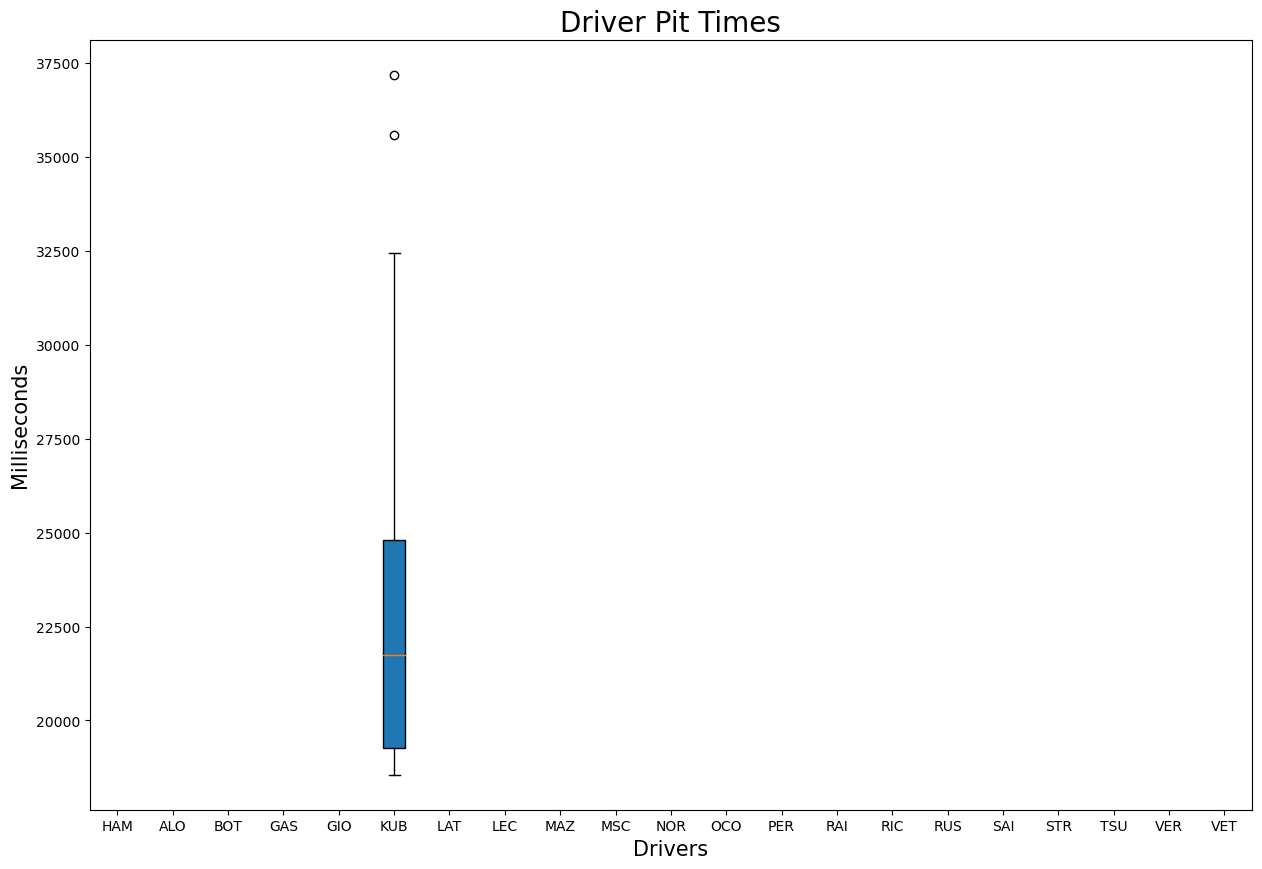

In [195]:
plot = [HAM, ALO, BOT, GAS, GIO, KUB, LAT, LEC, MAZ, MSC, NOR, OCO, PER, RAI, RIC, RUS, SAI, STR, TSU, VER, VET]
drivers = ["HAM", "ALO", "BOT", "GAS", "GIO", "KUB", "LAT", "LEC", "MAZ", "MSC", "NOR", "OCO", "PER", "RAI", "RIC", "RUS", "SAI", "STR", "TSU", "VER", "VET"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=drivers, widths = 0.4, patch_artist=True,vert=True)


plt.show()

TypeError: cannot perform reduce with flexible type

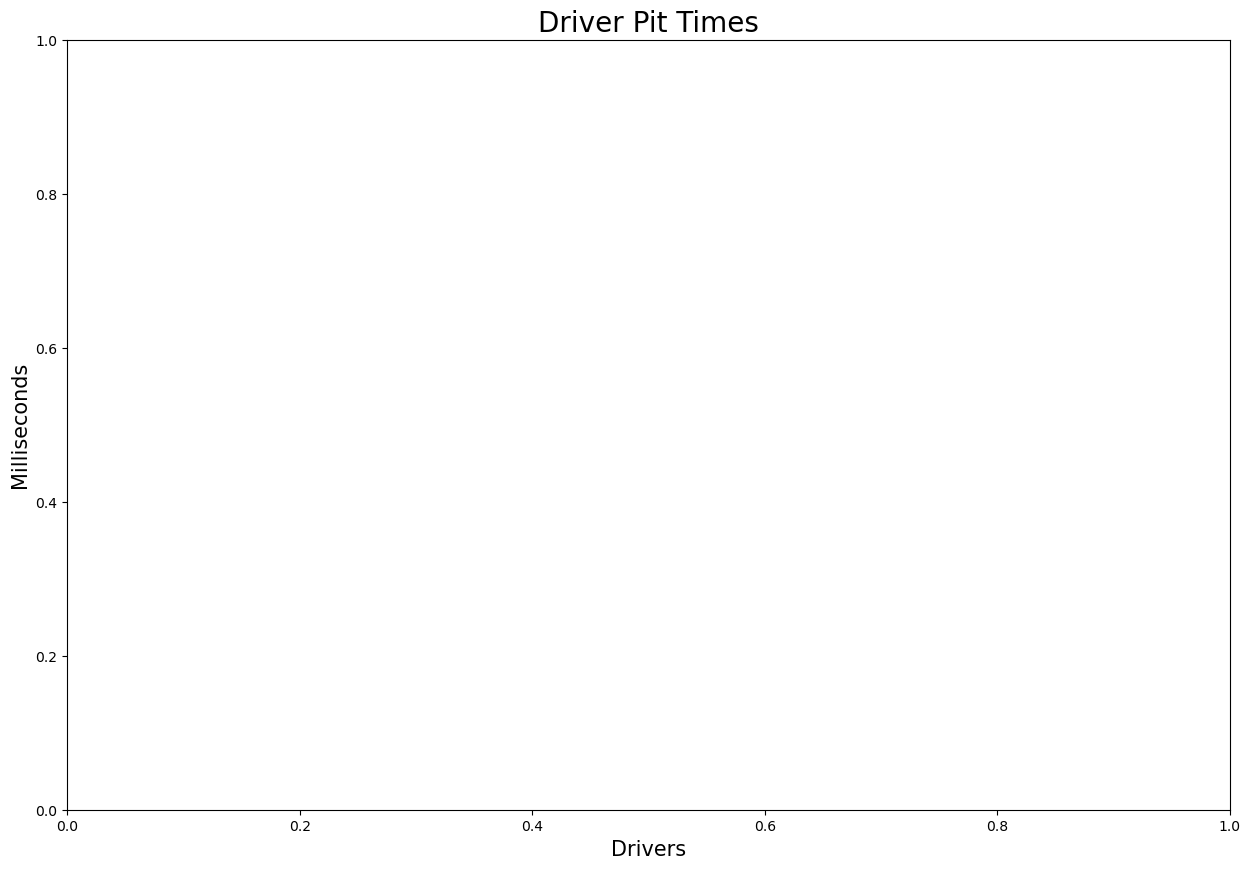

720      23993.0
721      38338.0
722      24373.0
723      24899.0
724      24925.0
          ...   
15027    22661.0
15028    21385.0
15029    22070.0
15030    21909.0
15031    21920.0
Name: milliseconds_y, Length: 769, dtype: float64

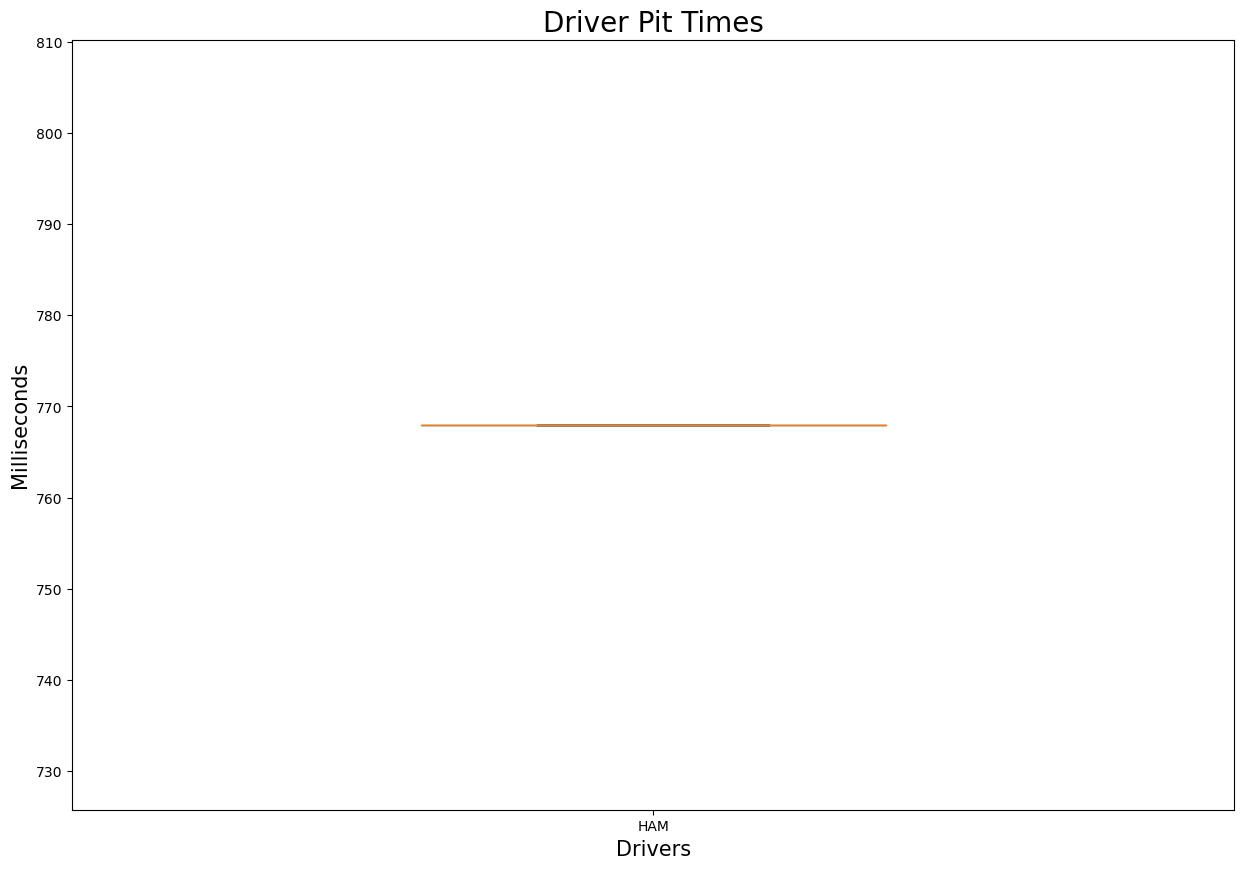

In [126]:
plot = [HAM['milliseconds_y'].count()]
Regimen = ["HAM"]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)


plt.show()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24966,1052,1,131,44,2,1,1,1,25.0,...,23993.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,24966,1052,1,131,44,2,1,1,1,25.0,...,38338.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,24966,1052,1,131,44,2,1,1,1,25.0,...,24373.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
3,24966,1052,1,131,44,2,1,1,1,25.0,...,24899.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
4,24966,1052,1,131,44,2,1,1,1,25.0,...,24925.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,25387,1073,1,131,44,2,2,2,2,18.0,...,22661.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14854,25387,1073,1,131,44,2,2,2,2,18.0,...,21385.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14855,25387,1073,1,131,44,2,2,2,2,18.0,...,22070.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
14856,25387,1073,1,131,44,2,2,2,2,18.0,...,21909.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton


resultId               int64
raceId                 int64
driverId               int64
constructorId          int64
number_x              object
grid                   int64
position              object
positionText          object
positionOrder          int64
points               float64
laps                   int64
time                  object
milliseconds_x        object
fastestLap            object
rank                  object
fastestLapTime        object
fastestLapSpeed       object
statusId               int64
driverId_y           float64
stop                 float64
lap                  float64
pitTime               object
duration              object
milliseconds_y       float64
driverRef             object
number_y              object
code                  object
forename              object
surname               object
dob                   object
driverNationality     object
driverUrl             object
driverName            object
dtype: object

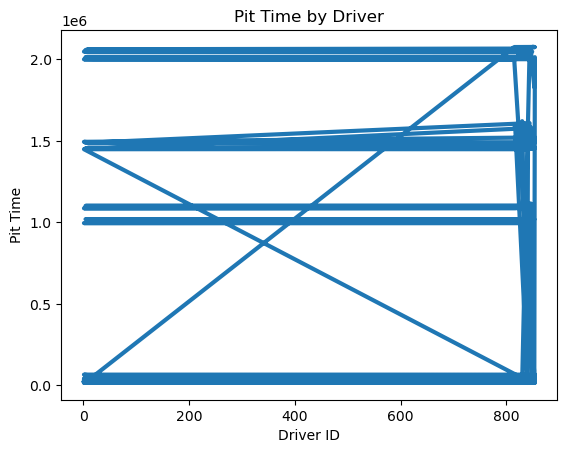

In [67]:
df2_line = df2["driverId"]
pit = df2["milliseconds"]

plt.title('Pit Time by Driver')
plt.plot(df2_line, pit,linewidth=3,)
plt.xlabel('Driver ID')
plt.ylabel('Pit Time')

plt.show()

,driverId,driverRef,number,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,Guanyu Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,Oscar Piastri


driverId              int64
driverRef            object
number               object
code                 object
forename             object
surname              object
dob                  object
driverNationality    object
driverUrl            object
driverName           object
dtype: object

raceId            int64
driverId          int64
stop              int64
lap               int64
pit_time         object
duration         object
milliseconds      int64
seconds         float64
dtype: object

df5

In [82]:
df5

,raceId_x,driverId_x,stop,lap,pit_time,duration,milliseconds_x,seconds,resultId,raceId_y,...,positionOrder,points,laps,time,milliseconds_y,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,26.898,154,25,...,6,3.0,70,+40.304,5550549,22,6,1:17.507,204.879,1
1,841,30,1,1,17:05:52,25.021,25021,25.021,31,19,...,9,0.0,56,+1:16.220,5554775,55,9,1:36.206,207.417,1
2,841,17,1,11,17:20:48,23.426,23426,23.426,18,18,...,18,0.0,0,\N,\N,\N,\N,\N,\N,4
3,841,4,1,12,17:22:34,23.251,23251,23.251,5,18,...,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
4,841,13,1,13,17:24:10,23.842,23842,23.842,14,18,...,14,0.0,25,\N,\N,21,11,1:29.502,213.300,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,25.174,850,57,...,20,0.0,12,\N,\N,11,16,1:35.415,194.233,9
9630,1096,840,2,40,18:04:44,21.802,21802,21.802,841,57,...,11,0.0,59,\N,\N,57,14,1:34.091,196.966,11
9631,1096,839,2,41,18:06:09,21.734,21734,21.734,840,57,...,10,0.0,59,\N,\N,47,11,1:34.035,197.084,11
9632,1096,846,2,42,18:07:36,21.559,21559,21.559,847,57,...,17,0.0,29,\N,\N,21,20,1:37.214,190.639,9


,resultId,raceId,driverId_x,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverId_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,1,18,1,1,22,1,1,1,1,10.0,...,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
1,2,18,2,2,3,5,2,2,2,8.0,...,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
2,3,18,3,3,7,7,3,3,3,6.0,...,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,4,18,4,4,5,11,4,4,4,5.0,...,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
4,5,18,5,1,23,3,5,5,5,4.0,...,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima,Kazuki Nakajima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,826,kvyat,26,KVY,Daniil,Kvyat,1994-04-26,Russian,http://en.wikipedia.org/wiki/Daniil_Kvyat,Daniil Kvyat
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,Jack Aitken


,resultId,raceId_x,driverId_x,constructorId_x,number_x,grid,position,positionText,positionOrder,points,...,driverId_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,1,18,1,1,22,1,1,1,1,10.0,...,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
1,2,18,2,2,3,5,2,2,2,8.0,...,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
2,3,18,3,3,7,7,3,3,3,6.0,...,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,4,18,4,4,5,11,4,4,4,5.0,...,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
4,5,18,5,1,23,3,5,5,5,4.0,...,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima,Kazuki Nakajima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,826,kvyat,26,KVY,Daniil,Kvyat,1994-04-26,Russian,http://en.wikipedia.org/wiki/Daniil_Kvyat,Daniil Kvyat
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,Jack Aitken


,driverId,driverRef,number,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,Guanyu Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,Oscar Piastri


,raceId,driverId,stop,lap,pit_time,duration,milliseconds,seconds
8030,1052,815,1,2,18:11:56,23.993,23993,23.993
8031,1052,842,1,4,18:16:14,38.338,38338,38.338
8032,1052,4,1,11,18:27:32,24.373,24373,24.373
8033,1052,846,1,12,18:29:05,24.899,24899,24.899
8034,1052,844,1,12,18:29:06,24.925,24925,24.925
...,...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661,22.661
8824,1073,815,3,53,18:23:09,21.385,21385,21.385
8825,1073,854,2,52,18:23:42,22.070,22070,22.070
8826,1073,852,2,53,18:24:01,21.909,21909,21.909


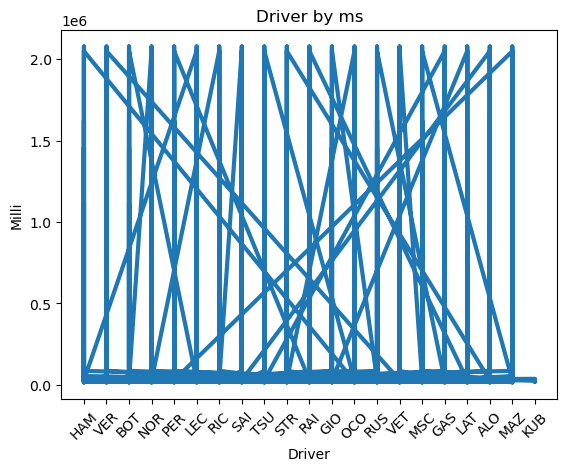

In [170]:
x = df3['code']
y = df3['milliseconds_y']


# Set the xlabel and ylabel, title using class methods
plt.title('Driver by ms')
plt.plot(x, y,linewidth=3,)
plt.xlabel('Driver')
plt.ylabel('Milli')
plt.xticks(rotation=45)

plt.show()

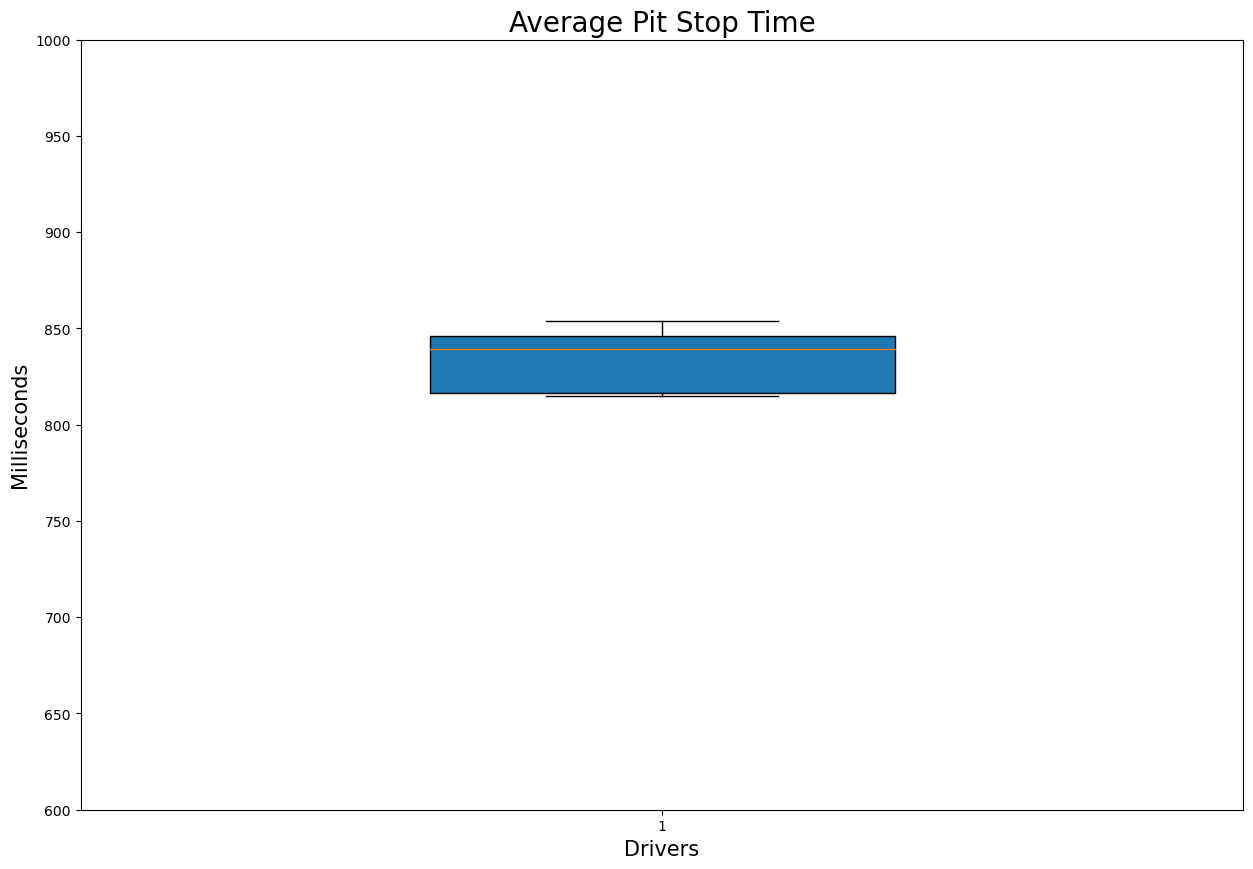

In [59]:
plot = [df3['driverId']]
Regimen= ['milliseconds_y']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Average Pit Stop Time',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, 'gD', widths = 0.4, patch_artist=True,vert=True)
plt.ylim(600, 1000)
plt.show()


In [43]:
df3['milliseconds_y'].unique

<bound method Series.unique of 0        23993.0
1        38338.0
2        24373.0
3        24899.0
4        24925.0
          ...   
15375    22661.0
15376    21385.0
15377    22070.0
15378    21909.0
15379    21920.0
Name: milliseconds_y, Length: 15380, dtype: float64>

In [45]:
df3['milliseconds_y'].isna().sum()

20

AttributeError: Can only use .str accessor with string values!